In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    
    def __init__(self,in_features = 4,h1 = 8, h2 =8, out_features=3):
        super().__init__()
        #how many layers?
        
        self.fc1 = nn.Linear(in_features,h1,device='cuda:0')
        self.fc2 = nn.Linear(h1,h2,device='cuda:0')
        self.out = nn.Linear(h2,out_features,device='cuda:0')
        
        #input layer (4 for iris data) --> h1 --> h2 --> output (3 for iris data)
    
    def forward(self,x):
        x = F.relu(self.fc1(x),device='cuda:0')
        x = F.relu(self.fc2(x),device='cuda:0')
        x = self.out(x)
        return x

In [4]:
torch.manual_seed(32)
model = Model()
model.to(torch.device("cuda:0"))

RuntimeError: No CUDA GPUs are available

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv(r"C:\Users\akhil\Downloads\Iris.csv")

In [106]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [107]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


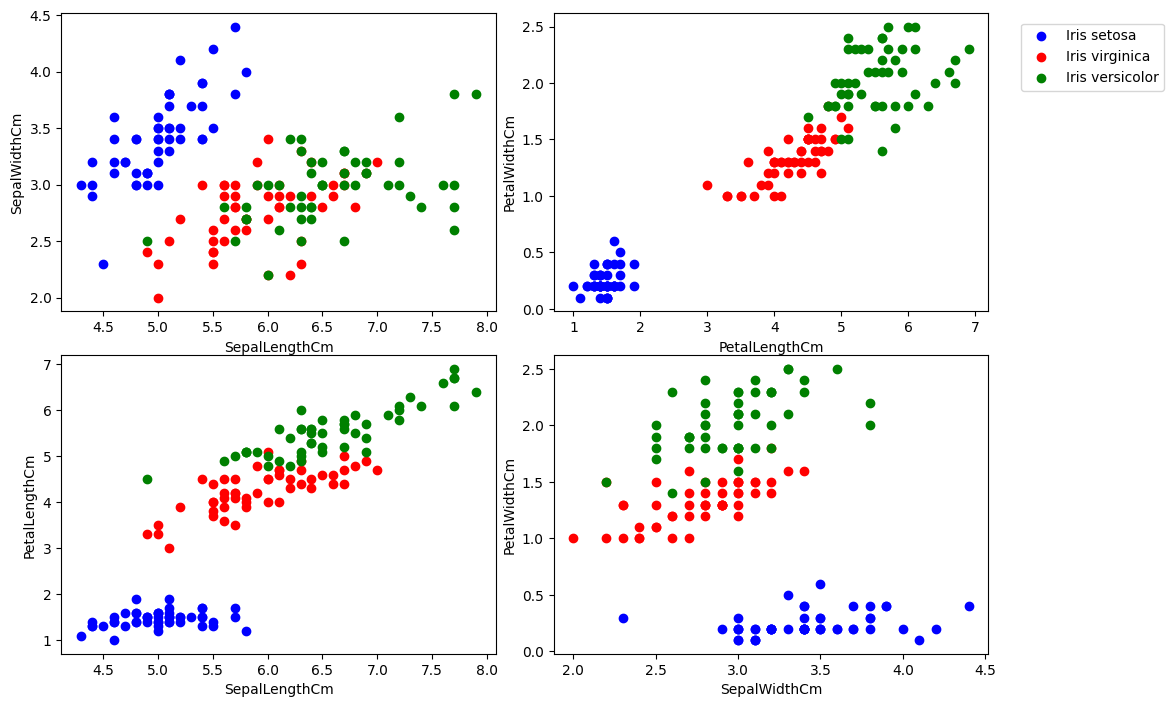

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (10,7))
fig.tight_layout()
plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g' ]
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']
for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['Species']==j][x], df[df['Species']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [109]:
X = df.drop('Species',axis=1)
y = df['Species']

In [110]:
X = X.values
y = y.values

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=33)

In [ ]:
X_train = torch.tensor(X_train,device='cuda:0')
X_test = torch.tensor(X_test,device='cuda:0')

In [ ]:
y_train = torch.tensor(y_train,device = 'cuda')
y_test = torch.tensor(y_test,device='cuda:0')

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [100]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [101]:
epochs = 100
losses = list()
for epoch in range(epochs):
    y_pred = model.forward(X_train) 
    loss = criterion(y_pred,y_train)
    losses.append(loss.item())
    if epoch%10==0 or epoch== 0:
        print(f"Epoch {epoch} and loss is {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

RuntimeError: mat1 and mat2 must have the same dtype

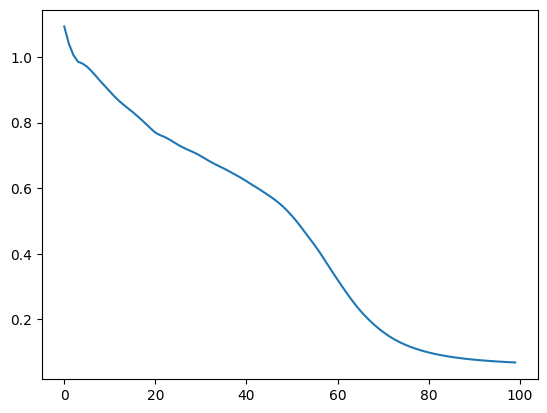

In [38]:
plt.plot(range(epochs),losses)

In [39]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [40]:
loss

tensor(0.0624)

In [41]:
correct = 0
wrong = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1}.) {y_val.argmax().item()} {y_test[i]}")
        
        if y_val.argmax().item() == y_test[i]:
            correct = correct + 1
        else:
            wrong = wrong + 1

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2


In [42]:
correct

30

In [43]:
wrong

0

In [44]:
torch.save(model,'my_model.pt')

In [45]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

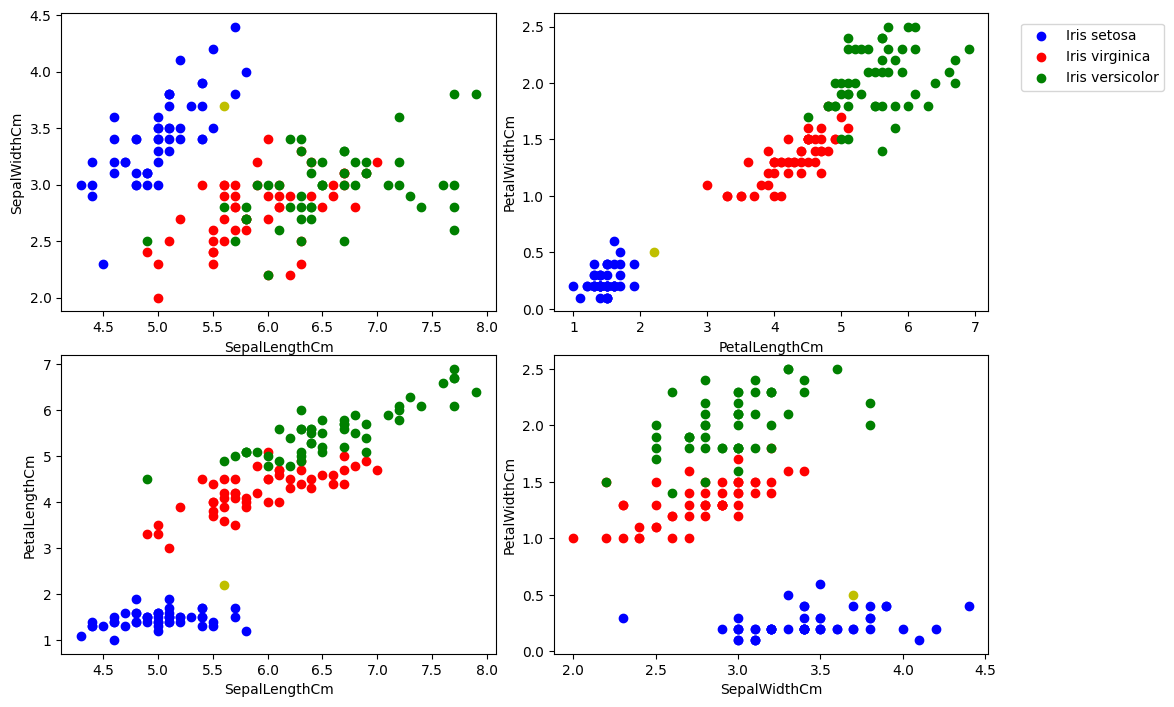

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (10,7))
fig.tight_layout()
plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g' ]
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']
for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['Species']==j][x], df[df['Species']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]],color='y')
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()